In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('orders.csv')
df = df.drop('Unnamed: 0',axis=1)
df['date'] = pd.to_datetime(df['date'])
df

,client,delivery_place,date,product,product_description,measure,quantity,is_internal_client,warehouse_zone,product_type,product_subtype,order_id
0,1128254,6346669,2023-01-06,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,600.0,Não,AMB,Bebidas,Aguas Minerais,1
1,1001096,6001131,2023-01-03,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,120.0,Não,AMB,Bebidas,Aguas Minerais,2
2,1001096,6001131,2023-01-17,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,120.0,Não,AMB,Bebidas,Aguas Minerais,3
3,1121833,6358142,2023-01-04,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,12.0,Não,AMB,Bebidas,Aguas Minerais,4
4,1122758,6328488,2023-01-04,126898,AGUA DAS PEDRAS SALGADAS 6x0.33 PET,UN,60.0,Não,AMB,Bebidas,Aguas Minerais,5
...,...,...,...,...,...,...,...,...,...,...,...,...
434415,1002555,6010385,2023-01-31,623226,BATA NCARREGADA M/COMP. C/LOGO ITAU 2XL,UN,2.0,Sim,NAL,Nao Alimentares,Fardamento,4690
434416,1002555,6010385,2023-01-31,623260,T-SHIRT BRANCA UNISEXO C/LOGO ITAU M,UN,2.0,Sim,NAL,Nao Alimentares,Fardamento,4690
434417,1002555,6320067,2023-01-31,126440,CARDINAL S/CAB.CONG.CX 6 KG,KG,6.0,Sim,CON,Peixe,Peixe Congelado,14701
434418,1002554,6107653,2023-01-31,563492,ESPIRAIS TRICOLORES 500 GR NACIONAL,KG,2.0,Sim,AMB,Mercearia,Massas Secas,14710


Dataset description:
- Data types:
    - Numeric:
        - client: internal code of the client
        - delivery_place: internal code for a client delivery place (each client can have many delivery places)
        - date: date of the order
        - product: internal code of the product
        - quantity
    - Categorical:
        - product_description
        - measure: unit used to measure quantity number
        - is_internal_client: if the client belongs to the company group, i.e. has the same holding company
        - warehouse_zone: internal code of the zone the product is located in the warehouse
        - product_type
        - product_subtype

In [2]:
#Print categorical feature
print(df.warehouse_zone.unique())

['AMB' 'REF' 'CON' 'NAL' 'DET' 'BAT' 'FRL' 'SAL' 'CAR' 'MAT' 'FRE' 'PEX']


Now we should use choose which variables to encode for that we can:

In [3]:
#Use get_dummies in pandas
#Another option: OneHotEncoder in sci-kit learn
print(pd.get_dummies(df['warehouse_zone']).head(5))

   AMB  BAT  CAR  CON  DET  FRE  FRL  MAT  NAL  PEX  REF  SAL
0    1    0    0    0    0    0    0    0    0    0    0    0
1    1    0    0    0    0    0    0    0    0    0    0    0
2    1    0    0    0    0    0    0    0    0    0    0    0
3    1    0    0    0    0    0    0    0    0    0    0    0
4    1    0    0    0    0    0    0    0    0    0    0    0


In [4]:
#Decide on which categorical variables we want in our model
for c in df.columns:
    if df[c].dtypes == 'object':
        unique_cat= len(df[c].unique())
        print(f"Feature '{c}' has {unique_cat} unique categories")

Feature 'product_description' has 4685 unique categories
Feature 'measure' has 9 unique categories
Feature 'is_internal_client' has 2 unique categories
Feature 'warehouse_zone' has 12 unique categories
Feature 'product_type' has 16 unique categories
Feature 'product_subtype' has 197 unique categories


In [5]:
#Let's check the the variables with a lot of categories
print(df['product_description'].value_counts().sort_values(ascending=False).head(10))
print(df['product_subtype'].value_counts().sort_values(ascending=False).head(10))
print(df['product_type'].value_counts().sort_values(ascending=False).head(10))

TARA CAIXA PLAST NOVA F/L                  31327
ALFACE                                      5653
CENOURA                                     5070
TOMATE MEDIO                                4655
LEITE M/GORDO UHT LT AGROS PROFISSIONAL     4426
BATATA BRANCA                               4223
SAL CRISTAL SALDOMAR KG                     3197
COUVE LOMBARDO                              3133
ARROZ LONGO COMUM AGULHA EUROCHEFE 1 KG     3072
ACUCAR GRANULADO SACO PAPEL 1 KG RAR        2977
Name: product_description, dtype: int64
Horticolas Frescos            35854
Taras (Outras)                32833
Horticolas Congelados         28548
Frutas Frescas                26309
Iogurtes                      22862
Leite                         13392
Peixe Congelado               10752
Enchidos-Charcutaria Porco    10510
Biosog                         8820
Queijos                        8437
Name: product_subtype, dtype: int64
Mercearia          155873
Legumes             96485
Frutas              33

In [6]:
df = df[df['product_description']!='TARA CAIXA PLAST NOVA F/L']

In [7]:
#Create a list of features to dummy
todummy_list = ['is_internal_client','warehouse_zone','product_type','product_description','measure']

In [8]:
#Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_lsit):
    for i in todummy_list:
        dummies = pd.get_dummies(df[i], prefix=i, dummy_na=False)
        df = df.drop(i,1)
        df = pd.concat([df,dummies], axis=1)
    return df

In [9]:
df = dummy_df(df, todummy_list)
print(df.head(5))

C:\Users\berna\AppData\Local\Temp\ipykernel_12920\4124444329.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(i,1)
C:\Users\berna\AppData\Local\Temp\ipykernel_12920\4124444329.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(i,1)
C:\Users\berna\AppData\Local\Temp\ipykernel_12920\4124444329.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(i,1)
C:\Users\berna\AppData\Local\Temp\ipykernel_12920\4124444329.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(i,1)
C:\Users\berna\AppData\Local\Temp\ipykernel_12920\4124444329.py:5: FutureWarning: In a future version of pandas all argument

    client  delivery_place       date  product  quantity product_subtype  \
0  1128254         6346669 2023-01-06   126898     600.0  Aguas Minerais   
1  1001096         6001131 2023-01-03   126898     120.0  Aguas Minerais   
2  1001096         6001131 2023-01-17   126898     120.0  Aguas Minerais   
3  1121833         6358142 2023-01-04   126898      12.0  Aguas Minerais   
4  1122758         6328488 2023-01-04   126898      60.0  Aguas Minerais   

   order_id  is_internal_client_Não  is_internal_client_Sim  \
0         1                       1                       0   
1         2                       1                       0   
2         3                       1                       0   
3         4                       1                       0   
4         5                       1                       0   

   warehouse_zone_AMB  ...  \
0                   1  ...   
1                   1  ...   
2                   1  ...   
3                   1  ...   
4             

## Missing data?

In [10]:
#How much of data is missing?
df.isnull().sum().sort_values(ascending=False).head()

client                                                       0
product_description_ORTANIQUES                               0
product_description_OVOS TIPO S CX 15 DZ  CLARA GEMA         0
product_description_OVOS TIPO M EMBALAGEM 1DZ AVIAVA         0
product_description_OVOS TIPO M EMBALAGEM 1 DZ CLARA GEMA    0
dtype: int64

## Explore the data for a more clear view

In [11]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    otlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    otlier_values = list(x[otlier_indices])
    
    return otlier_indices, otlier_values

In [12]:
tukey_indices, tukey_values = find_outliers_tukey(df['quantity'])
print(np.sort(tukey_values))

[3.47000e+01 3.50000e+01 3.50000e+01 ... 1.80000e+05 3.06293e+05
 3.60000e+05]


## Distribution of features

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title(f"Histogram of {x.name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

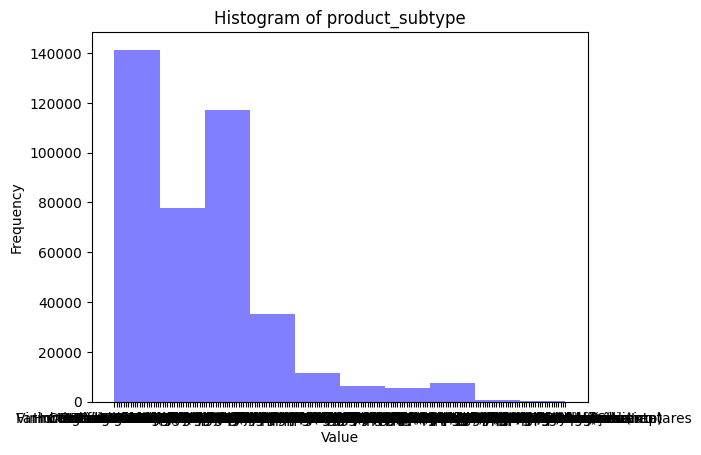

In [14]:
plot_histogram(df['product_subtype'])

## Feature Engineering

### Adding features

In [15]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
def add_interactions(df):
    #Get feature names
    combos= list(combinations(list(df.columns),2))
    colnames= list(df.columns) + ['_'.join(x) for x in combos]
    
    #Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df=pd.DataFrame(df)
    df.columns = colnames
    
    #Remove interaction term with all 0 values
    no = [i for i, x in enumerate(list((df==0).all()))if x]
    df = df.drop(df.columns(no),axis=1)
    
    return df

In [17]:
df_nodate=df.drop(['date'],axis=1)
df_interactions = add_interactions(df_nodate)
print(df_interactions.head(5))

ValueError: could not convert string to float: 'Aguas Minerais'

### Reducing Features

In [20]:
#Use regularization to deal with text data
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df_pca= pd.DataFrame(pca.fit_transform(df_nodate))
print(df_pca.head())

ValueError: could not convert string to float: 'Aguas Minerais'